In [16]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import array
from vmdpy import VMD
import pandas as pd
from scipy.fftpack import fft

In [17]:
filename = r'.\data2\WindForecast_20210101-20220904.csv'
f = pd.read_csv(filename, usecols=[0])

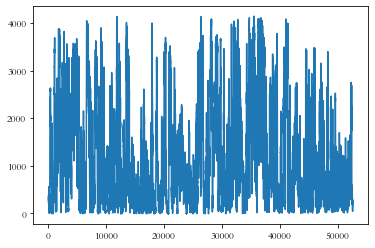

In [18]:
plt.plot(f.values)
alpha = 59500  # moderate bandwidth constraint
tau = 0.  # noise-tolerance (no strict fidelity enforcement)
K_ = [1, 2, 3, 4, 5, 6, 7, 8]  # K modes
center_fre = []
DC = 0  # no DC part imposed
init = 1  # initialize omegas uniformly
tol = 1e-7

In [19]:
for K in K_:
    u, u_hat, omega = VMD(f.values, alpha, tau, K, DC, init, tol)
    center_fre.append(omega[-1].tolist())
center_ = np.array(center_fre, dtype=object)
# plt.figure()
for i in range(len(K_)):
    a = center_[i]
    print('执行第%d组中心频率' % i)
    dataframe = pd.DataFrame({'v{}'.format(i + 1): a})
    dataframe.to_csv(r".\frequency_data\%d个IMF中心频率-%d.csv" % ((i + 1), (i + 1)), index=False, sep=',')

KeyboardInterrupt: 

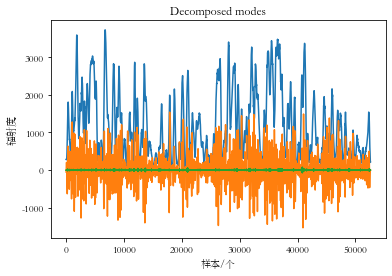

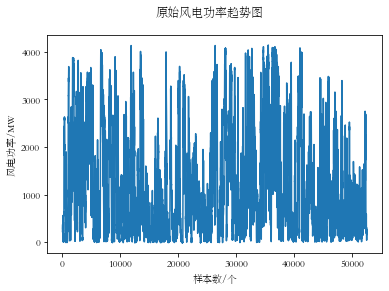

In [24]:
u, u_hat, omega = VMD(f.values, alpha, tau, K_[2], DC, init, tol)
K = K_[2]
plt.rcParams['font.sans-serif'] = ['STSONG', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel('样本/个')
plt.ylabel('辐射度')
plt.plot(u.T)
plt.title('Decomposed modes')
plt.savefig('./img_data/Decomposed modes.png',dpi=700,bbox_inches="tight")
fig1 = plt.figure()
# 汉字字体，优先使用华文宋体，找不到则使用黑体
plt.rcParams['font.sans-serif'] = ['STSONG', 'SimHei']
# 正常显示负号
plt.rcParams['axes.unicode_minus'] = False
plt.ylabel('风电功率/MW')
plt.xlabel('样本数/个')
plt.plot(f.values)

fig1.suptitle('原始风电功率趋势图')
plt.savefig('./img_data/Original_components.png',dpi=700,bbox_inches="tight")
plt.show()